# Integration of multiple cell line with hypoxia and cell painting markers
## Hypoxia, Cell painting marker
Cell line: HepG2, A549, AC16, RD
Condition: normoxia, hypoxia 6h, hypoxia 24h, hypoxia 48h, hypoxia 72h, hypoxia 6d, hypoxia 10d  


In [1]:
import sys

sys.path.append("/mnt/8tb/fbao/drug__/code")
from functions.helper import *
import pickle
from clipn import CLIPn
from sklearn.decomposition import PCA

In [2]:
with open("hypoxia.pkl", "rb") as f:
    data = pickle.load(f)

X = data["X"]
y = data["y"]
marker = data["marker"]
cell_line = data["cell_line"]

label_mapping = dict(
    zip(
        [
            "Normoxia",
            "Hypoxia_6h",
            "Hypoxia_24h",
            "Hypoxia_48h",
            "Hypoxia_72h",
            "Hypoxia_6d",
            "Hypoxia_10d",
        ],
        range(7),
    )
)

In [3]:
for i in range(6):
    y[i] = np.vectorize(label_mapping.get)(y[i])

latent_dim = 10

## Visualization of hypoxia data

/tmp/ipykernel_2582580/800356645.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[i, j].scatter(embed[:, 0], embed[:, 1], c=label, cmap="tab10", s=1)
/tmp/ipykernel_2582580/800356645.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[i, j].scatter(embed[:, 0], embed[:, 1], c=label, cmap="tab10", s=1)
/tmp/ipykernel_2582580/800356645.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[i, j].scatter(embed[:, 0], embed[:, 1], c=label, cmap="tab10", s=1)
/tmp/ipykernel_2582580/800356645.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[i, j].scatter(embed[:, 0], embed[:, 1], c=label, cmap="tab10", s=1)
/tmp/ipykernel_2582580/800356645.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[i, j].scatter(embed[:, 0], embed[:, 1], c=label,

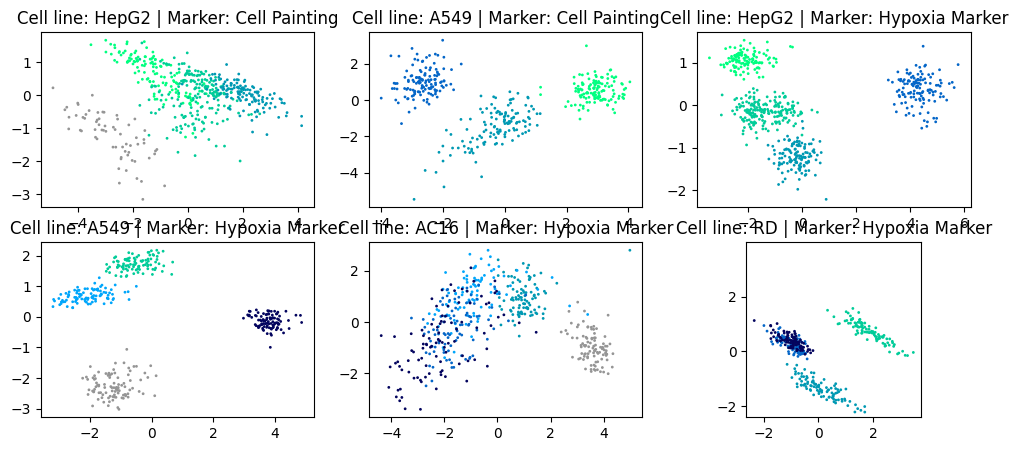

In [4]:
fig, axs = plt.subplots(2, 3, figsize=(12, 5))
k = 0  # figure count

cmap = plt.get_cmap("winter_r")

# Generate 6 colors from the colormap
color_1 = [cmap(i / 5) for i in range(6)]
cmap = plt.get_cmap("Greys")

# Generate 3 colors from the colormap
color_2 = [cmap(i / 2) for i in range(3)]
colors = [color_2[1]] + color_1[:3] + ["#00a6fb", "#0466c8", "#03045e"]
# colors = ['#bd9391', '#48cae4', '#00b4d8', '#118ab2', '#6096ba', '#274c77']
color_mapping = dict(zip(range(7), colors))

pc = PCA(n_components=2)
for i in range(2):
    for j in range(3):
        feature = X[k]
        label = y[k]

        label = pd.Series(label).map(color_mapping).values

        embed = pc.fit_transform(feature)

        cl = cell_line[k]
        mk = marker[k]

        axs[i, j].scatter(embed[:, 0], embed[:, 1], c=label, cmap="tab10", s=1)
        axs[i, j].set_title("Cell line: {} | Marker: {}".format(cl, mk))
        plt.axis("square")
        k += 1

plt.show()

# Run integration approaches
1. CCA
2. StabMap
3. MLP
4. CLIP<sup>n</sup>

### CCA

Running CCA ...


/mnt/8tb/fbao/drug__/code/functions/helper.py:951: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(
/mnt/8tb/fbao/drug__/code/functions/helper.py:965: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax2.scatter(


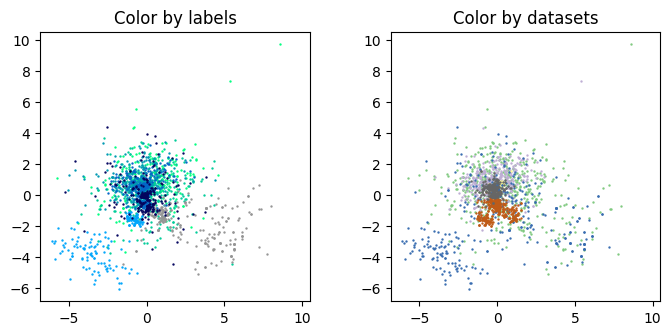

In [5]:
cca = multi_CCA(X, y, latent_dim=latent_dim)
z_cca = cca.fit_transform(X, y)
pca_scatter_hypoxia(z_cca, y)

### StabMap

Running Stabmap ...


/mnt/8tb/fbao/drug__/code/functions/helper.py:951: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(
/mnt/8tb/fbao/drug__/code/functions/helper.py:965: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax2.scatter(


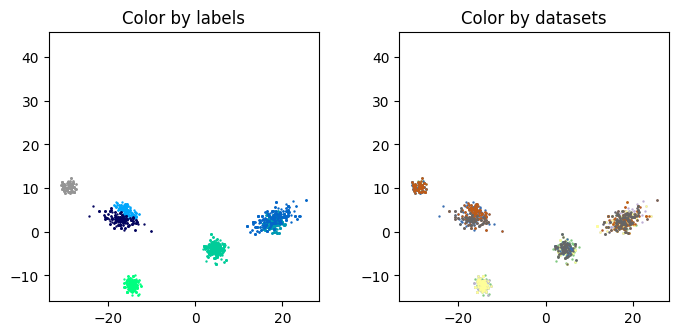

In [6]:
stab = multi_stabmap(X, y, latent_dim=latent_dim)
z_stab = stab.fit_transform(X, y)
pca_scatter_hypoxia(z_stab, y)

### MLP

Running MLP ...


/mnt/8tb/fbao/drug__/code/functions/helper.py:951: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(
/mnt/8tb/fbao/drug__/code/functions/helper.py:965: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax2.scatter(


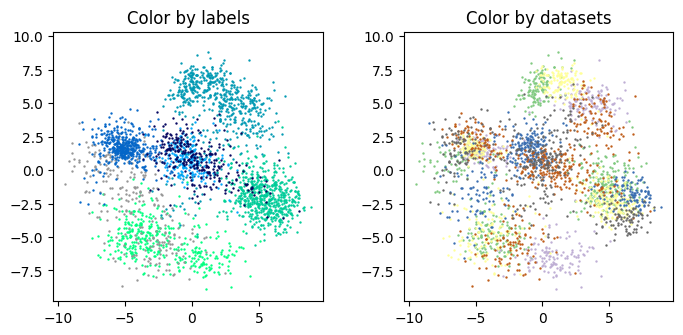

In [7]:
from MLP.model import MLP

max_dim = 0

for i in X.keys():
    max_dim = max(max_dim, X[i].shape[1])

model = MLP(max_dim, 10)
model.fit(X, y, lr=1e-5)
z_mlp = model.embedding(X)
pca_scatter_hypoxia(z_mlp, y)

### CLIP<sup>n</sup>

Running CLIPn ...


  0%|          | 0/300 [00:00<?, ?it/s]

/mnt/8tb/fbao/drug__/code/functions/helper.py:951: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(
/mnt/8tb/fbao/drug__/code/functions/helper.py:965: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax2.scatter(


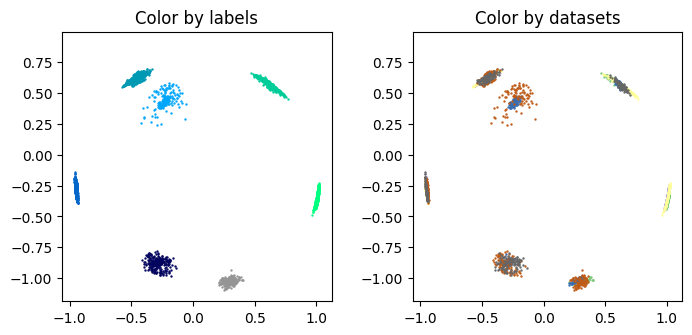

In [8]:
clpn = CLIPn(X, y, latent_dim=latent_dim, gpu="cuda:1")
loss = clpn.fit(X, y, lr=5e-4, epochs=300)
z_clipn = clpn.predict(X)
pca_scatter_hypoxia(z_clipn, y)

In [9]:
z = dict()
z["CCA"] = z_cca
z["StabMap"] = z_stab
z["MLP"] = z_mlp
z["CLIPn"] = z_clipn
with open("hypoxia_z.pkl", "wb") as f:
    pickle.dump(z, f)